
**Import Libraries**

In [79]:
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [29]:
df=pd.read_csv("diamonds.csv",index_col=0)
data1=df.copy

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **Getting know data**

In [31]:
df.columns


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [32]:
df.shape


(53940, 10)

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [34]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [35]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [36]:
df.loc[(df.x==0) | (df.y==0) |df.z==0]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0
26124,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0
27113,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
27504,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0


In [37]:
df.loc[(df.x==0) | (df.y==0) |df.z==0].shape

(12, 10)

In [38]:
df.loc[(df.x==0) | (df.y==0) |df.z==0].index

Int64Index([2208, 2315, 4792, 5472, 10168, 13602, 24395, 26124, 27113, 27504,
            27740, 51507],
           dtype='int64')

In [39]:
df.drop(df.loc[(df.x==0) | (df.y==0) |df.z==0].index,axis=0,inplace=True)

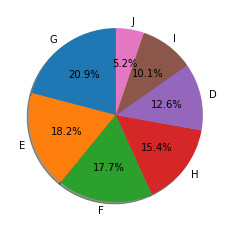

In [40]:
color=df["color"].value_counts()
labels=color.index
sizes=color.values
plt.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True,startangle=90)
plt.show()


# **Visualisation**

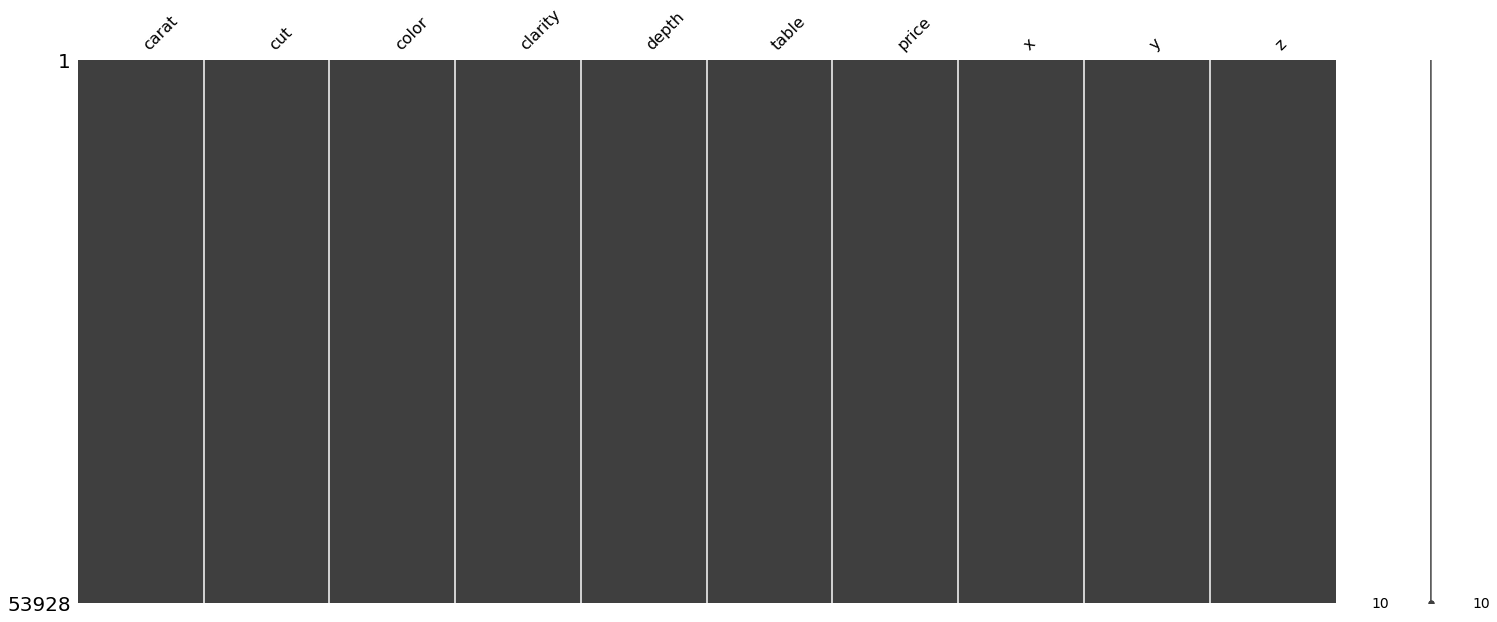

In [41]:
msn.matrix(df)


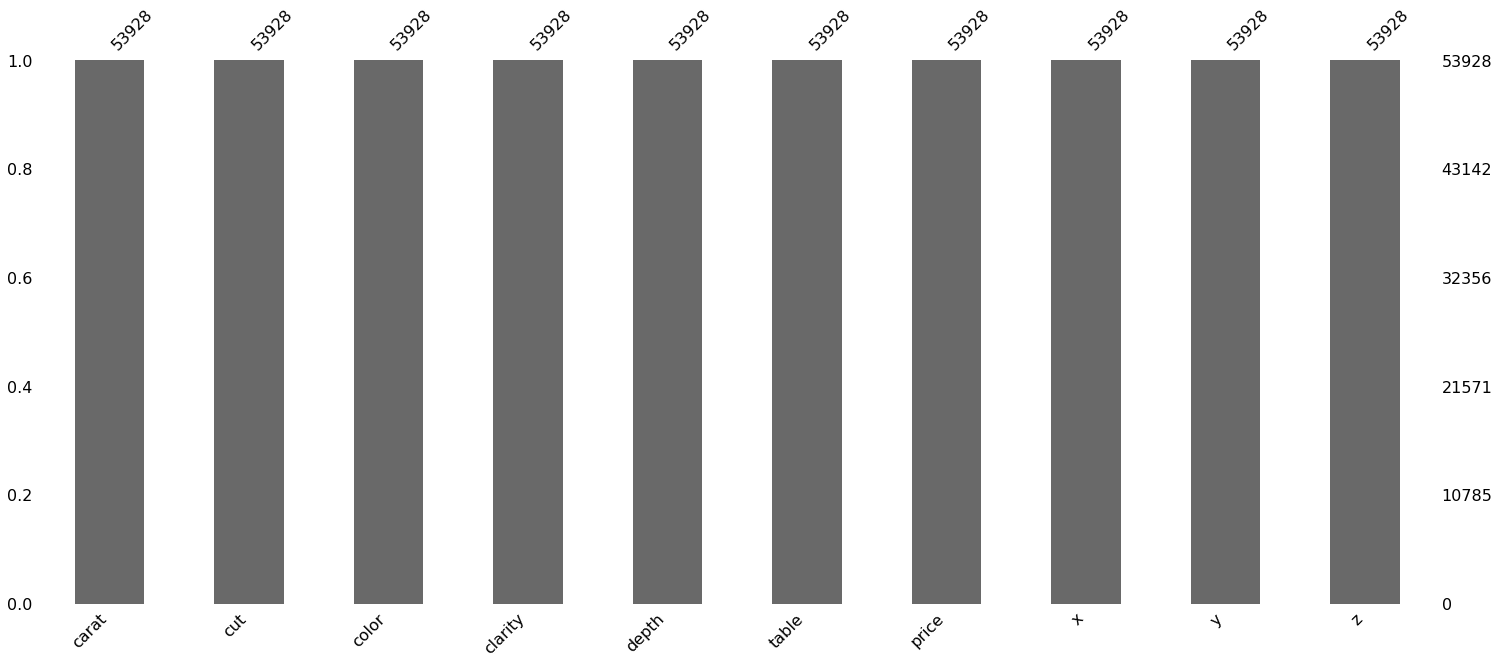

In [42]:
msn.bar(df)


# **Getting numeric and categorical data**

In [43]:
numeric_cols=df._get_numeric_data().columns
categoric_cols=list(set(df.columns)-set(numeric_cols))

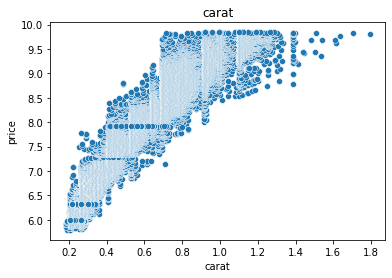

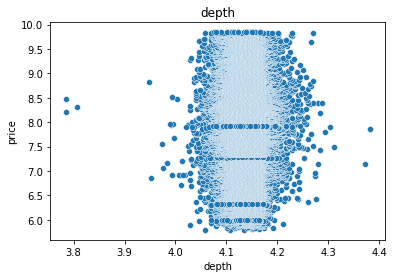

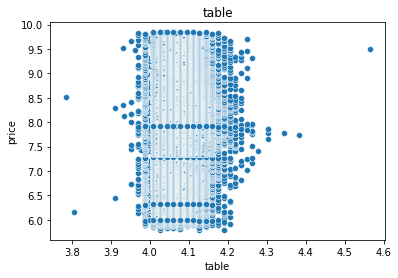

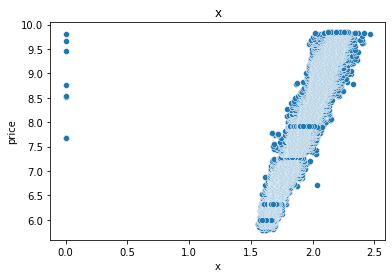

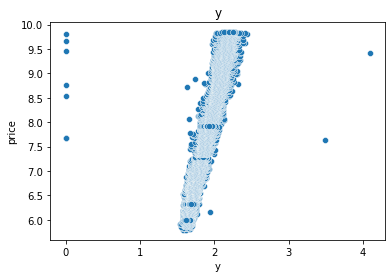

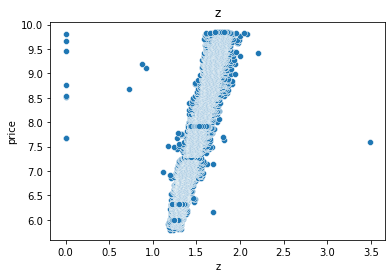

In [44]:
for col in numeric_cols:
    if col!='price':
        plt.title(col)
        sns.scatterplot(x=np.log1p(df[col]), y=np.log1p(df['price']),data=df)
        plt.show()

In [45]:
cut = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5, }
df["cut"]=df["cut"].map(cut)

In [46]:
color = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6,'D': 7}
df['color'] = df['color'].map(color)

In [47]:
clarity= {'SI2': 2, 'SI1': 3, 'VS1': 5, 'VS2': 4, 'VVS2': 6, 'VVS1': 7, 'I1': 1, 'IF': 8 }
df['clarity'] = df['clarity'].map(clarity)

In [48]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


# **Model Building**

In [60]:
X=df.drop('price', axis=1)
Y=df['price']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.33, random_state=42)


In [83]:
def model_building(algo, X_train,X_test, Y_train,Y_test):
    model=algo
    model.fit(X_train, Y_train)
    Y_train_pre=model.predict(X_train)
    Y_test_pre=model.predict(X_test)
    test_error=r2_score(Y_test, Y_test_pre)
    train_error=r2_score(Y_train, Y_train_pre)
    return  train_error, test_error

In [84]:
cv={'model': [], 'train_error':[], 'test_error':[]}
models=[LinearRegression(), Lasso(), Ridge(), ElasticNet()]

for model in models:
    res=model_building(model, X_train,X_test, Y_train,Y_test)
    cv['model'].append(type(model).__name__)
    cv['train_error'].append(res[0])
    cv['test_error'].append(res[0])
    
res=pd.DataFrame(cv)
print(res)

              model  train_error  test_error
0  LinearRegression     0.907322    0.907322
1             Lasso     0.907306    0.907306
2             Ridge     0.907322    0.907322
3        ElasticNet     0.810575    0.810575


# **Polynomial Regression**

In [89]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.33, random_state=42)

poly=PolynomialFeatures(degree=2)
poly.fit(X_train)
X_train_poly=poly.transform(X_train)
X_test_poly=poly.transform(X_test)

In [90]:
cv={'model': [], 'train_error':[], 'test_error':[]}


In [91]:
for model in models:
    res=model_building(model, X_train_poly,X_test_poly, Y_train,Y_test)
    cv['model'].append(type(model).__name__)
    cv['train_error'].append(res[0])
    cv['test_error'].append(res[0])
    
res=pd.DataFrame(cv)
print(res)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.155e+10, tolerance: 5.823e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


              model  train_error  test_error
0  LinearRegression     0.964024    0.964024
1             Lasso     0.960697    0.960697
2             Ridge     0.963944    0.963944
3        ElasticNet     0.951703    0.951703


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.577e+10, tolerance: 5.823e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
